In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Tarea 2 
### Selección de atributos
#### Attribute Relevance Analysis in Python — IV and WoE
##### Realizado por Ixchel Dafne Avendaño Pacheco 
Matricula: 23265456

<img src= https://miro.medium.com/v2/resize:fit:720/format:webp/1*RcO8rGpq36Eqo2LwxZKRNw.jpeg>

##### Análisis de Relevancia de Atributos
La fase de análisis de relevancia de los atributos tiene la tarea de reconocer los atributos (características) con mayor impacto en la deserción. Los atributos que muestren un mayor poder de segregación en relación con la deserción (deserción = “Sí” o “No”) mediante el análisis de relevancia del atributo se seleccionarán como los mejores candidatos para construir un modelo predictivo de deserción. [1]


Se basa en dos términos: Valor de la información y Peso de la evidencia.

##### El peso de la evidencia    (WoE)
El peso de la evidencia indica el poder predictivo de una variable independiente en relación con la variable dependiente. Dado que evolucionó a partir del mundo de la calificación crediticia, generalmente se describe como una medida de separación entre buenos y malos clientes. “Malos clientes” se refiere a los clientes que incumplieron con un préstamo. y “Buenos Clientes” se refiere a los clientes que pagaron el préstamo.[2]

##### EL valor de la información   (IV)
El valor de la información es una de las técnicas más útiles para seleccionar variables importantes en un modelo predictivo. Ayuda a clasificar las variables según su importancia.[3]

##### Requisitos previos de WoE y IV
1. El conjunto de datos debe estar limpio. Se pueden completar los valores faltantes con la palabra ' MISSING ', se sugiere que se haga para ver cómo se conectan los valores faltantes con la variable de destino.
2. No debería haber ningún atributo continuo. Los atributos que representan la edad o cualquier cosa continua deben agruparse en 5 a 10 contenedores, según su gusto. Asegurarse de que cada contenedor tenga al menos el 5% de las observaciones.


El ejemplo de Análisis de relevancia de atributos para modelado de abandono se divide en 6 pasos:

1. Limpieza y preparación de datos
2. Calcular IV y WoE
3. Clasificación gruesa
4. Creación de variables ficticias
5. Correlaciones entre variables ficticias

In [2]:
#Se carga el Data Frame y se imrpimen los datos
data = pd.read_csv(r'Churn_Modelling.csv')
print(data)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMemb

In [3]:
#Se muestra de esta manera para una mejor visualización
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


##### 1. Limpieza y preparación de datos
1. Elimine RowNumber , CustomerId y Surname ; son arbitrarios y no se pueden usar.
2. Agrupe la puntuación de crédito , la edad , el saldo y el salario estimado en 5 contenedores
3. Elimine puntación de crédito, la edad, el saldo y el salario estimado porque ya no son necesarios

In [4]:
#Se eliminan RowNumber, CustomerId, Surname
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

#Se agrupa la puntación de crédito
data['CreditScore_Bins'] = pd.qcut(data['CreditScore'], 5, 
                                   labels=['CS_lt_566', 'CS_556_to_627', 'CS_627_to_678', 'CS_678_to_735', 'CS_gt_735'])
#Se agrupa la edad
data['Age_Bins'] = pd.qcut(data['Age'], 5, 
                           labels=['Age_lt_31', 'Age_31_to_35', 'Age_35_to_40', 'Age_40_to_46', 'Age_gt_46'])
#Se agrupa el saldo
data['Balance_Bins'] = pd.qcut(data['Balance'], 5, 
                               labels=['Bal_lt_73080', 'Bal_73080_to_110138', 'Bal_110138_to_133710', 'Bal_gt_133710'],
                               duplicates='drop')
#Se agrupa el salario estimado
data['Salary_Bins'] = pd.qcut(data['EstimatedSalary'], 5, 
                              labels=['Sal_lt_41050', 'Sal_41050_to_80238', 'Sal_80238_to_119710', 'Sal_119710_to_159836', 'Sal_159836_to_199992'])
#Se eliminan  puntación de crédito, la edad, el saldo y el salario estimado
data.drop(['CreditScore', 'Age', 'Balance', 'EstimatedSalary'], axis=1, inplace=True)

In [5]:
data.head()

,Geography,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited,CreditScore_Bins,Age_Bins,Balance_Bins,Salary_Bins
0,France,Female,2,1,1,1,1,CS_556_to_627,Age_40_to_46,Bal_lt_73080,Sal_80238_to_119710
1,Spain,Female,1,1,0,1,0,CS_556_to_627,Age_40_to_46,Bal_73080_to_110138,Sal_80238_to_119710
2,France,Female,8,3,1,0,1,CS_lt_566,Age_40_to_46,Bal_gt_133710,Sal_80238_to_119710
3,France,Female,1,2,0,0,0,CS_678_to_735,Age_35_to_40,Bal_lt_73080,Sal_80238_to_119710
4,Spain,Female,2,1,1,1,0,CS_gt_735,Age_40_to_46,Bal_110138_to_133710,Sal_41050_to_80238


##### 2. Calcular IV y WoE

Se procede a realizar el cálculo de IV y WoE. 
A continuación se muestra la función que calculará el peso de la evidencia y el valor de la información. Dado Pandas DataFrame, el nombre del atributo y el nombre de la variable de destino, hará los cálculos.
La función devolverá Pandas DataFrame y puntuación IV. 

In [6]:
#Se define la función para calcular el IV y el WoE
def calculate_woe_iv(dataset, feature, target):
    lst = []
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })
        
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    
    dset = dset.sort_values(by='WoE')
    
    return dset, iv

In [7]:
for col in data.columns:
    if col == 'Exited': continue
    else:
        print('WoE and IV for column: {}'.format(col))
        df, iv = calculate_woe_iv(data, col, 'Exited')
        print(df)
        print('IV score: {:.2f}'.format(iv))
        print('\n')

WoE and IV for column: Geography
     Value   All  Good  Bad  Distr_Good  Distr_Bad       WoE        IV
2  Germany  2509  1695  814    0.212859   0.399607 -0.629850  0.117623
1    Spain  2477  2064  413    0.259199   0.202749  0.245626  0.013865
0   France  5014  4204  810    0.527942   0.397644  0.283430  0.036930
IV score: 0.17


WoE and IV for column: Gender
    Value   All  Good   Bad  Distr_Good  Distr_Bad       WoE        IV
0  Female  4543  3404  1139    0.427477   0.559156 -0.268527  0.035359
1    Male  5457  4559   898    0.572523   0.440844  0.261361  0.034416
IV score: 0.07


WoE and IV for column: Tenure
    Value   All  Good  Bad  Distr_Good  Distr_Bad       WoE        IV
10      0   413   318   95    0.039935   0.046637 -0.155153  0.001040
1       1  1035   803  232    0.100841   0.113893 -0.121710  0.001589
9       9   984   771  213    0.096823   0.104566 -0.076931  0.000596
6       3  1009   796  213    0.099962   0.104566 -0.045021  0.000207
8       5  1012   803  209

##### 3. Clasificación aproximada
Se desea agrupar instancias con WoE similares porque proporcionan la misma información.


Para este conjunto de datos, se debe aplicar una clasificación aproximada a España y Francia en el atributo Geography (WoE 0,24 y 0,28).

In [8]:
#Se  aplica una clasificación aproximada a España y Francia en el atributo Geography
geography_df, geography_iv=calculate_woe_iv(data, 'Geography', 'Exited')
geography_df

,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
2,Germany,2509,1695,814,0.212859,0.399607,-0.629850,0.117623
1,Spain,2477,2064,413,0.259199,0.202749,0.245626,0.013865
0,France,5014,4204,810,0.527942,0.397644,0.283430,0.036930


In [9]:
def coarse_classer(df, indexloc_1, indexloc_2):
    mean_val = pd.DataFrame(np.mean(pd.DataFrame([df.iloc[indexloc_1], df.iloc[indexloc_2]]))).T
    original = df.drop([indexloc_1, indexloc_2])
    
    coarsed_df = pd.concat([original, mean_val])
    coarsed_df = coarsed_df.sort_values(by='WoE', ascending=False).reset_index(drop=True)
    
    return coarsed_df

geography_df = coarse_classer(geography_df, 1, 2)
geography_df

,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
0,France,5014.0,4204.0,810.0,0.527942,0.397644,0.283430,0.036930
1,NaN,3745.5,3134.0,611.5,0.393570,0.300196,0.264528,0.025398


##### 4. Creación de variables ficticias
Una variable ficticia es aquella que toma el valor 0 o 1 para indicar la ausencia o presencia de algún efecto categórico que se puede esperar que cambie el resultado.[4]

In [10]:
#Se crean variables falsas 
geography_dummies = pd.get_dummies(data['Geography'], drop_first=True, prefix='Geography')
num_products_dummies = pd.get_dummies(data['NumOfProducts'], drop_first=True, prefix='Num_Prods')
age_dummies = pd.get_dummies(data['Age_Bins'], drop_first=True)

df = pd.concat([geography_dummies, num_products_dummies, age_dummies, data[['IsActiveMember', 'Exited']]], axis=1)

In [11]:
df.head()

,Geography_Germany,Geography_Spain,Num_Prods_2,Num_Prods_3,Num_Prods_4,Age_31_to_35,Age_35_to_40,Age_40_to_46,Age_gt_46,IsActiveMember,Exited
0,0,0,0,0,0,0,0,1,0,1,1
1,0,1,0,0,0,0,0,1,0,1,0
2,0,0,0,1,0,0,0,1,0,0,1
3,0,0,1,0,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0,1,0,1,0


##### 5. Correlaciones entre variables ficticias
El último paso de este proceso es calcular las correlaciones entre variables ficticias y excluir aquellas con alta correlación.

Se sugiere eliminar cualquier cosa con una correlación superior a 0,7 (de valor absoluto).

Si se pregunta qué variable ficticia eliminar entre las dos, elimine la que tenga menor peso de evidencia , debido a una conexión más débil con la variable de destino.

Se traza una matriz de correlación para obtener una buena representación visual de las correlaciones:

Se observa que no existe correlación entre las variables ficticias y, por lo tanto, todas deben permanecer.


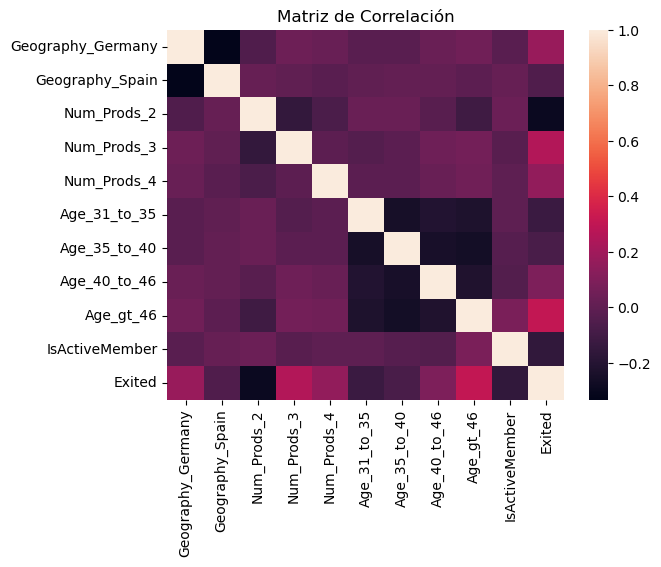

In [12]:
#Se imprime la matriz de correlacion
sns.heatmap(df.corr());
plt.title("Matriz de Correlación");

##### Conclusión

La selección de atributos es fundamental en ciencia de datos, ya que permite identificar las variables más relevantes para un modelo o análisis en particular. El Análisis de Relevancia de Atributos es una herramienta poderosa que se aplica en la selección de funciones y en la elaboración de perfiles de clientes. Esta herramienta ayuda a convertir los datos de comportamiento del perfil en valores agregados a nivel de perfil sin necesidad de realizar cálculos manuales. Además, la ciencia de datos es un enfoque multidisciplinario que combina principios y prácticas del campo de las matemáticas, la estadística, la inteligencia artificial y la ingeniería de computación para analizar grandes cantidades de datos. La selección de atributos es esencial en ciencia de datos, ya que permite contextualizar los datos y obtener información significativa para las empresas.

##### Bibliografia 
1. Klepac, G., Kopal, R., Mršić, L. (2014). Desarrollo de modelos de abandono utilizando técnicas de minería de datos y análisis de redes sociales. Estados Unidos: IGI-Global

2. https://www.listendata.com/2015/03/weight-of-evidence-woe-and-information.html#What-is-Weight-of-Evidence-WOE-

3. https://www.listendata.com/2015/03/weight-of-evidence-woe-and-information.html#Information-Value-IV-

4. https://en.wikipedia.org/wiki/Dummy_variable_(estadísticas)